In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt

In this lab you will apply logistic regression to a dataset of images with the goal of classifying each image as a smile (1) or non-smile (0). We are using a dataset of faces called GENKI.
First, we  download the dataset and explore it.



In [2]:
# Download dataset
# Note: this only needs to be done once!
if not os.path.exists("trainingLabels.npy"):
  !wget https://s3.amazonaws.com/jrwprojects/trainingLabels.npy
  !wget https://s3.amazonaws.com/jrwprojects/testingLabels.npy
  !wget https://s3.amazonaws.com/jrwprojects/trainingFaces.npy
  !wget https://s3.amazonaws.com/jrwprojects/testingFaces.npy

--2025-10-10 08:25:44--  https://s3.amazonaws.com/jrwprojects/trainingLabels.npy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.17.142, 54.231.166.80, 54.231.204.40, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.17.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16080 (16K) [binary/octet-stream]
Saving to: ‘trainingLabels.npy’

trainingLabels.npy  100%[===================>]  15.70K  --.-KB/s    in 0s      

2025-10-10 08:25:45 (180 MB/s) - ‘trainingLabels.npy’ saved [16080/16080]

--2025-10-10 08:25:45--  https://s3.amazonaws.com/jrwprojects/testingLabels.npy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.17.142, 54.231.166.80, 54.231.204.40, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.17.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14704 (14K) [binary/octet-stream]
Saving to: ‘testingLabels.npy’

testingLabels.npy   100%[===================>]  14.36K  --.-KB/s    in 0s     

In [3]:
# Load dataset
trainingFaces = np.load("trainingFaces.npy")
trainingLabels = np.load("trainingLabels.npy")
testingFaces = np.load("testingFaces.npy")
testingLabels = np.load("testingLabels.npy")
# Print out the dimensions of the arrays
print("trainingFaces shape: ", trainingFaces.shape)
print("trainingLabels shape: ", trainingLabels.shape)
print("testingFaces shape: ", testingFaces.shape)
print("testingLabels shape: ", testingLabels.shape)
# Print out basic statistics
print("Proportion 'smile' in training:", trainingLabels.mean())  # Proportion of training faces that are "smile"
print("Proportion 'smile' in testing:", testingLabels.mean())  # Proportion of testing faces that are "smile"

trainingFaces shape:  (2000, 576)
trainingLabels shape:  (2000,)
testingFaces shape:  (1828, 576)
testingLabels shape:  (1828,)
Proportion 'smile' in training: 0.5355
Proportion 'smile' in testing: 0.5464989059080962


The labels are binary (1 = smile, 0 = non-smile). The images are stored as arrays of grayscale pixel values (each image contains 24*24 = 576 total pixels).

Let's visualize some of the faces. We first have to reshape each image from a 576-dimensional vector (which is convenient for classification with logistic regression) to a 24x24 array (which is convenient for visualization):

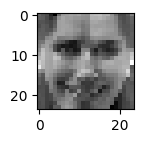

label:  1


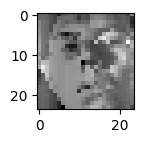

label:  0


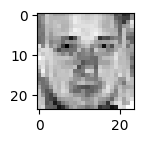

label:  0


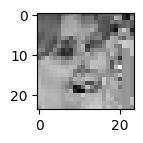

label:  1


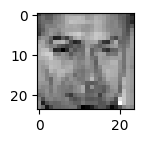

label:  1


In [4]:
for i in range(5):
  # Before rendering, we have to reshape the image vector into a 2-d array
  fig, ax = plt.subplots(figsize=(1.25, 1.25))
  ax.imshow(trainingFaces[i,:].reshape(24, 24), cmap='gray')
  plt.show()
  print("label: ", trainingLabels[i])

In most of the images, the label (smile vs. non-smile) is quite clear. However, in some it is not. Examine the 4 images below, and ask yourself: how would *you* classify them? (Note: you do not need to answer on Moodle.)

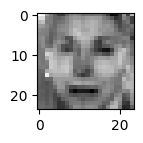

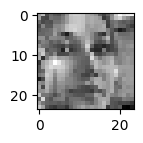

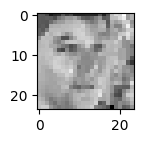

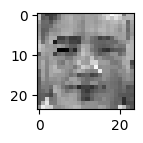

In [5]:
ambiguousIdxs = [ 187, 192, 566, 1401 ]
for idx in ambiguousIdxs:
  fig, ax = plt.subplots(figsize=(1.25, 1.25))
  ax.imshow(testingFaces[idx,:].reshape(24, 24), cmap='gray')
  plt.show()

## Task 1a: Logistic Regression for Smile Classification (1 Point)

**Your task**: Train a logistic regression classifier (use the LogisticRegression class in sklearn) on the entire training dataset, and measure its accuracy (proportion of correctly classified images) on  the testing data.

In [15]:
import sklearn.linear_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



logisticRegressor = sklearn.linear_model.LogisticRegression(max_iter=500)
# TODO: implement the rest here
logisticRegressor.fit(trainingFaces, trainingLabels)
labels_pred_testing = logisticRegressor.predict(testingFaces)

print("Accuracy:", accuracy_score(testingLabels, labels_pred_testing))



Accuracy: 0.7538293216630197


📢 **HAND-IN** 📢:
Enter the testing accuracy of the trained model on Moodle.

## Task 1b: Measure the Effect of Training Set Size on Training & Testing Accuracies (4 pts)
As a general rule: the more training data you have, the higher your testing accuracy will be. In this next task, you will explore this issue quantitatively.

**Your task**: Using the provided training and test data, experiment with how the size of the training set impacts the test accuracy. In particular, vary M over 100, 200, 300, ..., 2000. For each M, train a logistic regression classifier  containing M training examples (just use the first M examples) to recognize a smile (1) or non-smile (0). Then, measure *training* accuracy of the trained classifier (i.e., just the M examples you actually trained on) as well as the *test* accuracy (proportion of examples classified correctly). Plot these two curves in the same plot as a function of M. Why do you think the curves look the way they do?

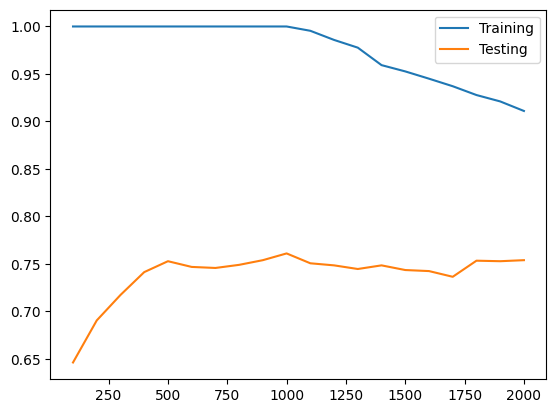

In [16]:
import sklearn.linear_model

trainingAccuracies = []
testingAccuracies = []
Mvalues = np.arange(100, 2001, 100)
for M in Mvalues:
  # TODO: implement the rest here
  X_train = trainingFaces[:M, :]
  y_train = trainingLabels[:M]

  logisticRegressor = sklearn.linear_model.LogisticRegression(max_iter=500)
  logisticRegressor.fit(X_train, y_train)

  train_pred = logisticRegressor.predict(X_train)
  train_acc = accuracy_score(y_train, train_pred)

  test_pred = logisticRegressor.predict(testingFaces)
  test_acc = accuracy_score(testingLabels, test_pred)


  trainingAccuracies.append(train_acc)  # TODO: change this
  testingAccuracies.append(test_acc)  # TODO: change this

plt.plot(Mvalues, trainingAccuracies)
plt.plot(Mvalues, testingAccuracies)
plt.legend([ "Training", "Testing" ])
plt.show()

📢 **HAND-IN** 📢:
On Moodle, upload your plot.

## Task 2a: Examining the "Worst" Mistakes (2 pts)
You can sometimes learn something  about both the dataset and a trained model by examining its "worst"  mistakes, i.e., examples on which the model is *highly confident* but *wrong*.  For this purpose, you can call the LogisticRegressor.predict_proba function, which returns a probability in the interval (0,1) rather than a binary prediction.

**Your task**:
Find the top 25 *positively-labeled* examples in the test set on which the trained classifier (using M=2000) was *most confident* but *wrong*, i.e., yhat nearest to 0. Show these images and the machine's probability estimate yhat. Do the same thing for the top 25 *negatively-labeled* examples in the test set on which yhat was closest to 1.

What do you observe about these particular examples and their labels?

In [17]:
# Utility method to plot the faces whose indices are specified in idxs
def show (idxs):
  for idx in idxs:
    fig, ax = plt.subplots(figsize=(1.25, 1.25))
    ax.imshow(testingFaces[idx,:].reshape(24,24), cmap='gray')
    plt.show()
    print(testingLabels[idx], yhat[idx])

Positive


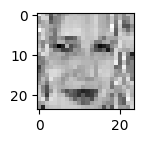

1 2.8351403967837894e-06


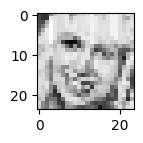

1 6.662501856181464e-05


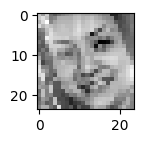

1 9.103671002868347e-05


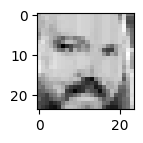

1 0.00011756598692086457


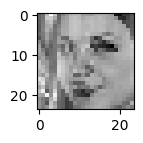

1 0.00025930325237032517


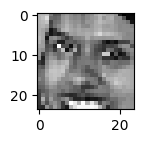

1 0.00029651930961306286


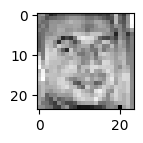

1 0.0003017518264873717


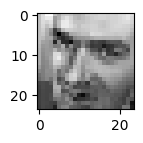

1 0.0004234669814454514


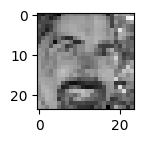

1 0.0004776805069581316


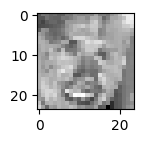

1 0.0004792655826055071


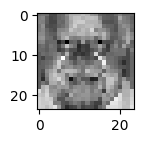

1 0.00048564574886272383


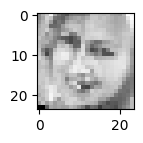

1 0.0005965877292218117


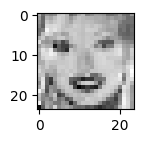

1 0.0006455049385925519


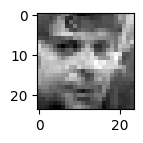

1 0.0008051976452374081


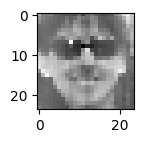

1 0.0009045902712770767


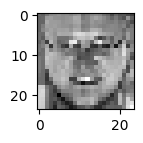

1 0.0009254966782851849


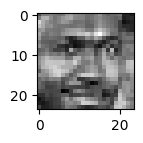

1 0.0010061767300902945


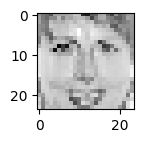

1 0.001021227392225533


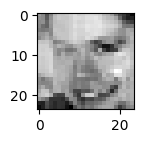

1 0.0013208114514702029


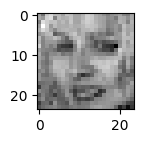

1 0.0014717201974370755


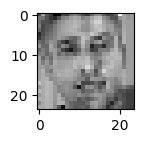

1 0.00167229970684517


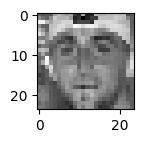

1 0.001765439302574782


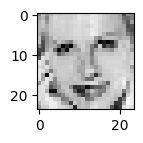

1 0.001796462372829619


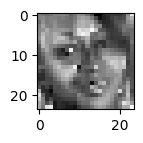

1 0.0022713477558417515


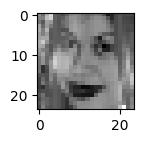

1 0.0023065906348027298
Negative


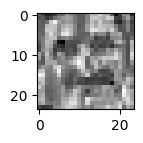

0 0.9999999934606809


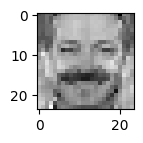

0 0.9999911916549012


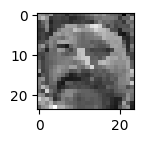

0 0.9999910995829536


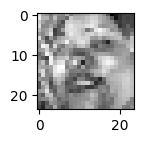

0 0.9999793125923615


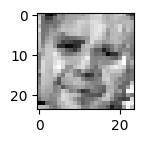

0 0.9999631695930848


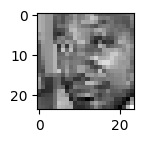

0 0.9999589222767464


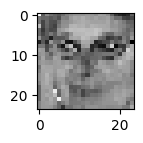

0 0.9998926776629545


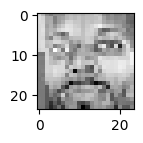

0 0.9998724078852366


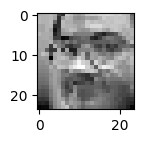

0 0.9998575992903911


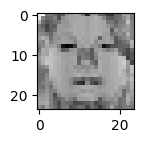

0 0.9997955914071542


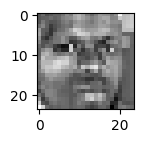

0 0.9996615144734443


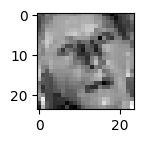

0 0.9996332459859536


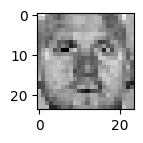

0 0.9994788866879423


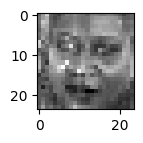

0 0.9992734231304853


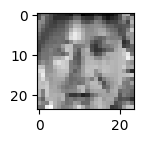

0 0.9990064516884153


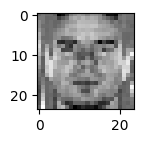

0 0.9990043475108464


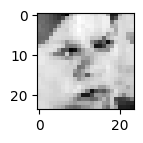

0 0.9989118368013311


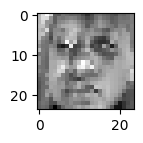

0 0.9986009244444537


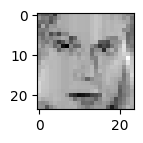

0 0.998587805465553


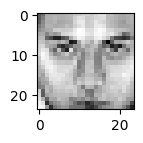

0 0.9985715504740317


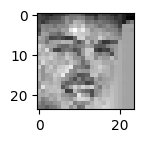

0 0.998311302636316


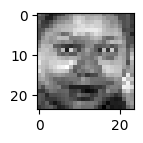

0 0.9983028561873596


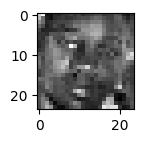

0 0.9980914783635907


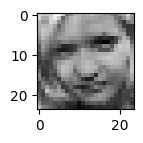

0 0.9977783887474512


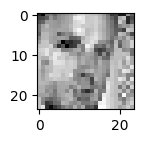

0 0.997196215687113


In [20]:
# In the line below, ",1" picks out the probability of the positive class (smile)
yhat = logisticRegressor.predict_proba(testingFaces)[:,1]

print("Positive")
# TODO: find the top 25 least worst mistakes for the positive examples
positive_idxs = np.where(testingLabels == 1)[0]
misclassified_pos_idxs = positive_idxs[yhat[positive_idxs] < 0.5]
sorted_misclassified_pos = misclassified_pos_idxs[np.argsort(yhat[misclassified_pos_idxs])]
idxs = sorted_misclassified_pos[:25]

show(idxs)
print("Negative")
# TODO: find the top 25 least worst mistakes for the negative examples
negative_idxs = np.where(testingLabels == 0)[0]
misclassified_neg_idxs = negative_idxs[yhat[negative_idxs] > 0.5]
sorted_misclassified_neg = misclassified_neg_idxs[np.argsort(yhat[misclassified_neg_idxs])[::-1]]
idxs = sorted_misclassified_neg[:25]
show(idxs)

📢 **HAND-IN** 📢:
On Moodle, offer an explanation (referring to specific attributes of the faces, e.g., eye-glasses, lighting, etc.) about why those particular images were highly confident but incorrectly classified.

## Task 2b: Finding Least Confidently Predicted Examples
It can be instructive to find examples on which the trained classifier is uncertain/not confident. For this purpose, you can call the LogisticRegressor.predict_proba, which returns a probability in the interval (0,1) rather than a binary probability.

**Your task**:
Find the top 25 examples in the test set on which the trained classifier (using M=2000) was *least confident* (i.e., yhat closest to 0.5) in its prediction. Show these images, the machine's probabilistic prediction, and the true label. Do you see any reason why those images might cause the machine some "confusion"? (Note: there may not be an obvious answer, but you can still speculate.)

Top 25 least confident examples (ŷ ≈ 0.5):


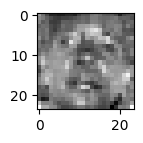

0 0.5007353115485389


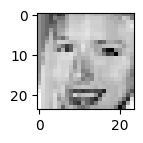

1 0.49896035186749665


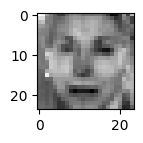

0 0.49848722481779173


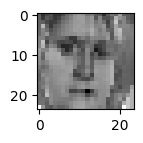

0 0.5039497885613489


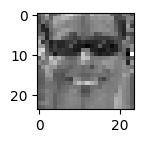

1 0.4957353130451503


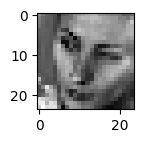

0 0.5044340206230967


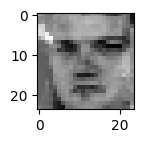

0 0.505385896646855


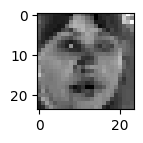

0 0.49399799619528517


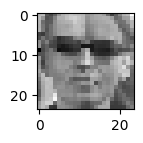

0 0.4938651111062132


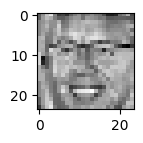

1 0.5076114259873405


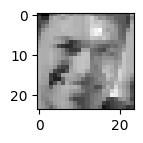

1 0.492106524805357


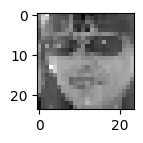

1 0.5100305539061083


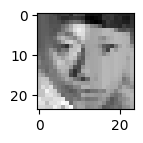

0 0.5119724112564652


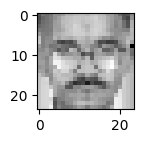

0 0.5120370137961652


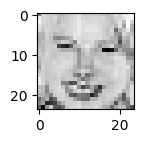

1 0.515915102519966


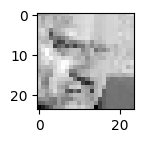

0 0.5165326352361901


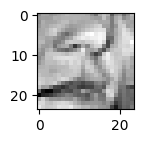

0 0.48314984425131124


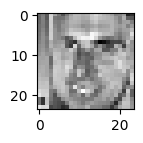

1 0.48282189347654403


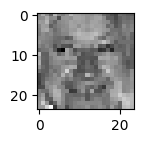

1 0.48280135795871304


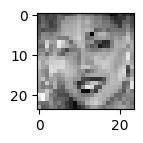

1 0.5172250314228046


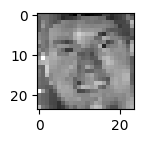

1 0.4805052821933481


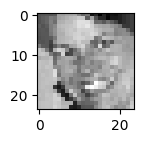

1 0.5205900813837663


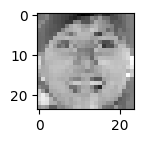

1 0.5217220841597779


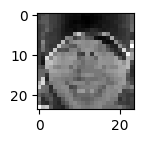

1 0.4782551301761543


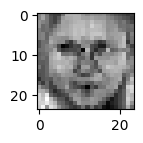

0 0.4781214493146752


In [22]:
# TODO: find 25 least confidently predicted examples
yhat = logisticRegressor.predict_proba(testingFaces)[:, 1]
uncertainty = np.abs(yhat - 0.5)

least_confident_idxs = np.argsort(uncertainty)[:25]



print("Top 25 least confident examples")
show(least_confident_idxs)


You do not need to submit anything on Moodle for this task.

# Task 3: Data Augmentation (3 pts)
A perennial problem in machine learning is the lack of sufficient training data. One way to increase the amount of training data is to use **data augmentation**, i.e., to synthetically create more training examples from the ones that already exist. While this is possible only in certain situations, it can be very powerful. One setting in which it often is possible is when working with images. Face images in particular have a special kind of symmetry: if you "flip" a face left-to-right, then the person's facial expression basically remains the same.  This means that, by flipping a face image left-to-right, we can create another face image with the same training label -- *without* having to manually photograph and label that example ourselves.

Below is a Python function that takes an array (M x 576) of face images and returns another array of the same size and contents, except that all the images have been flipped left-to-right.

In [23]:
def flip (faces):
    faces = np.atleast_3d(faces)
    faces = faces.reshape(-1, 24, 24)  # convert faces from vectors to 2-d arrays
    faces = faces[:, :, ::-1]  # flip all the 2-d arrays left-to-right
    return faces.reshape(-1, 24**2)  # convert faces from 2-d arrays to vectors

Here's an example of an original and a flipped face:

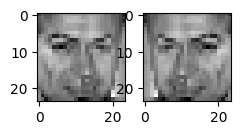

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(2.5, 2.5))
ax[0].imshow(trainingFaces[4,:].reshape(24, 24), cmap='gray')
ax[1].imshow(flip(trainingFaces[4,:]).reshape(24, 24), cmap='gray')
plt.show()

**Your task**: Using the flip function, try training on a larger dataset: the original training set was just 2000 images, but with this data augmentation technique, we can get up to 4000 images. Does training on this larger dataset improve testing accuracy? Create a plot similar to the one you made for Task 1b, but this time vary M up to 4000.

Augmented dataset shape: (4000, 576)


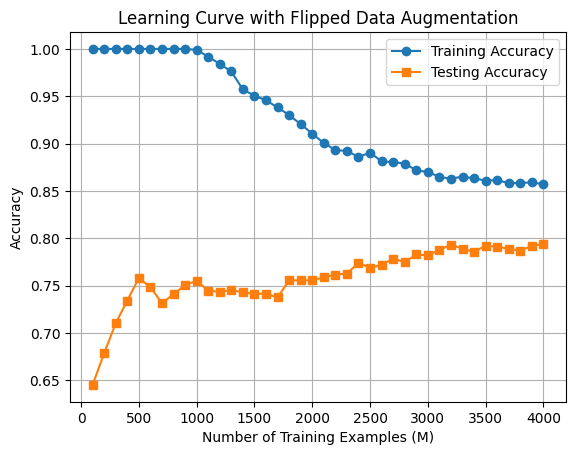

In [27]:
# TODO: apply data augmentation and create plot, similar to Task 1b.
# Create flipped faces
flippedFaces = flip(trainingFaces)

# Stack original + flipped faces
augmentedFaces = np.vstack([trainingFaces, flippedFaces])
augmentedLabels = np.hstack([trainingLabels, trainingLabels])

print("Augmented dataset shape:", augmentedFaces.shape)

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.metrics import accuracy_score

trainingAccuracies = []
testingAccuracies = []
Mvalues = np.arange(100, 4001, 100)

for M in Mvalues:
    X_train = augmentedFaces[:M, :]
    y_train = augmentedLabels[:M]

    logisticRegressor = sklearn.linear_model.LogisticRegression(max_iter=500, solver='liblinear')
    logisticRegressor.fit(X_train, y_train)

    # Accuracy on training subset
    train_pred = logisticRegressor.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)

    # Accuracy on the test set
    test_pred = logisticRegressor.predict(testingFaces)
    test_acc = accuracy_score(testingLabels, test_pred)

    trainingAccuracies.append(train_acc)
    testingAccuracies.append(test_acc)

# Plot
plt.plot(Mvalues, trainingAccuracies, marker='o')
plt.plot(Mvalues, testingAccuracies, marker='s')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Number of Training Examples (M)")
plt.ylabel("Accuracy")
plt.title("Learning Curve with Flipped Data Augmentation")
plt.grid(True)
plt.show()


📢 **HAND-IN** 📢:
On Moodle, upload your plot (where M ranges up to 4000).

# Task 4: Pushing the Limits (4 pts)
Now that you've trained a logistic regression classifier on this task, see how far you can "push the limit" and train as accurate a classifier as possible. This task is open-ended: you can try hyperparameter optimization, new forms of data augmentation, or other techniques.

*Hyperparameter tuning*: You may be able to increase the accuracy by optimizing the amount of regularization. In sklearn, the regularization strength of the logistic regression classifier can be tuned by setting the C parameter in the constructor of LogisticRegression. To optimize hyperparameters in a principled way, we need three data sets: training, validation, and testing. However, the data you are provided with contains just training and testing sets. Hence, you should sub-divide the training data into two subsets: "real" training (this is what you call fit() on), and validation (which you use to estimate how good each hyperparameter configuration is). As a suggestion, try using 80% of trainingFaces and trainingLabels for training, and the remaining 20% for validation.

*Data augmentation*: In addition to left-right flips, you can also try adding a small amount of (typically Gaussian) random noise to each pixel (using a small standard deviation of the Gaussian distribution, so that the face images still looks like a face). See np.random.randn. In order to avoid manually overfitting to the test data, you should also experiment with different forms of data augmentation on a separate validation set; then, once you find a good method of augmentation, test out the resulting classifier on the testing set.

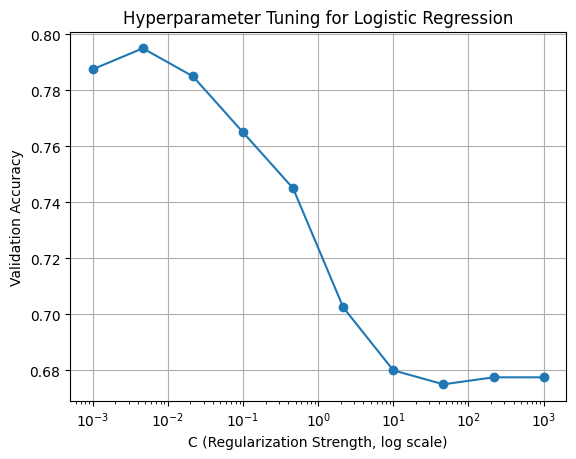

Best C: 0.004641588833612777
Test accuracy with best C: 0.8183807439824945


In [32]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    trainingFaces, trainingLabels, test_size=0.2, random_state=42
)


C_values = np.logspace(-3, 3, 10)  # 0.001, 0.002, ..., 1000
validation_accuracies = []

for C in C_values:
    model = LogisticRegression(max_iter=500, solver='liblinear', C=C)
    model.fit(X_train, y_train)

    val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    validation_accuracies.append(val_acc)

# Plot validation accuracy vs. C
plt.semilogx(C_values, validation_accuracies, marker='o')
plt.xlabel("C (Regularization Strength, log scale)")
plt.ylabel("Validation Accuracy")
plt.title("Hyperparameter Tuning for Logistic Regression")
plt.grid(True)
plt.show()

best_C = C_values[np.argmax(validation_accuracies)]
print("Best C:", best_C)

best_model = LogisticRegression(max_iter=500, solver='liblinear', C=best_C)
best_model.fit(trainingFaces, trainingLabels)

test_pred = best_model.predict(testingFaces)
test_acc = accuracy_score(testingLabels, test_pred)
print("Test accuracy with best C:", test_acc)



Best C: 0.0046, Validation Accuracy: 0.7950
Test Accuracy (best C): 0.8184


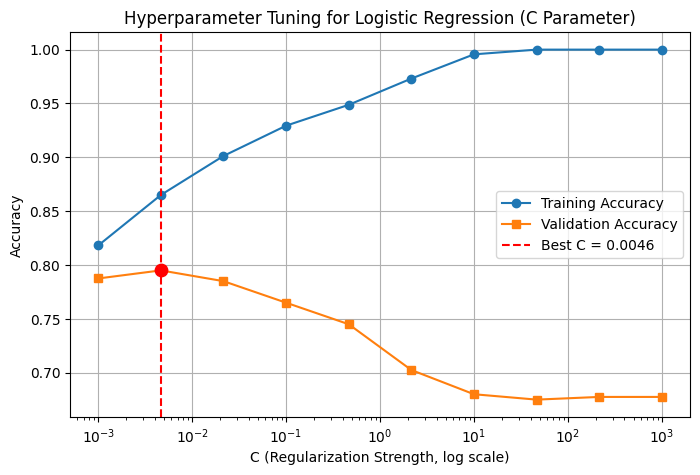

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split original training data into 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    trainingFaces, trainingLabels, test_size=0.2, random_state=42
)

# Range of C values to test (logarithmic scale)
C_values = np.logspace(-3, 3, 10)  # 0.001 to 1000
train_accuracies = []
val_accuracies = []

# Try each C value
for C in C_values:
    model = LogisticRegression(max_iter=500, solver='liblinear', C=C)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Find the best C (highest validation accuracy)
best_idx = np.argmax(val_accuracies)
best_C = C_values[best_idx]
print(f"Best C: {best_C:.4f}, Validation Accuracy: {val_accuracies[best_idx]:.4f}")

# Retrain the model with the best C on the entire training set
best_model = LogisticRegression(max_iter=500, solver='liblinear', C=best_C)
best_model.fit(trainingFaces, trainingLabels)

# Evaluate on the test set
test_pred = best_model.predict(testingFaces)
test_acc = accuracy_score(testingLabels, test_pred)
print(f"Test Accuracy (best C): {test_acc:.4f}")

# --- Plot Training vs Validation Accuracy ---
plt.figure(figsize=(8, 5))
plt.semilogx(C_values, train_accuracies, marker='o', label="Training Accuracy")
plt.semilogx(C_values, val_accuracies, marker='s', label="Validation Accuracy")

# Highlight best point
plt.axvline(best_C, color='red', linestyle='--', label=f"Best C = {best_C:.4f}")
plt.scatter(best_C, val_accuracies[best_idx], color='red', s=80, zorder=5)

plt.xlabel("C (Regularization Strength, log scale)")
plt.ylabel("Accuracy")
plt.title("Hyperparameter Tuning for Logistic Regression (C Parameter)")
plt.legend()
plt.grid(True)
plt.show()


📢 **HAND-IN** 📢:
On Moodle, upload your code above, and report the final testing accuracy.